# Getting started with SCIFYsim

## Import the library

In [1]:
import scifysim as sf
import numpy as np
import matplotlib.pyplot as plt
# optional (when using dark interfaces)
#plt.style.use("dark_background")

Building a model from scratch


In [2]:
my_target = "GJ 86 A"

In [3]:
print("SCIFYsim version: ", sf.version)
sf.logit.setLevel(sf.logging.ERROR)
t_exp =1.
seed = 10
expname = "R400_base_sensitivity"
save_results = False

SCIFYsim version:  0.2.2


In [4]:
configfile = "config/default_R400.ini"

In [5]:
asim = sf.utilities.prepare_all(configfile, thetarget=my_target, update_params=True,
                  instrumental_errors=True, seed=seed, update_start_end=False)
asim.combiner.chromatic_matrix(asim.lambda_science_range)

WARNING-astroquery- UnitsWarning: Unit 'e' not supported by the VOUnit standard. 
WARNING-astroquery- UnitsWarning: Unit 'Sun' not supported by the VOUnit standard. Did you mean uN?
ERROR-scifysim.utilities- Couldn't find the entry in JSDC catalog
Dist set to  10.786997784350653 [pc]
T set to  5263.5 [K]
R set to  0.77 [R_sun]
ERROR-scifysim.injection- Now we use fpath to provide the root for appendix config files


0.010342691863670104
sep =  4.5
pa =  60.0
offset =  (-3.8971143170299736, 2.2500000000000004)
----------------------------------------
Switching to znse+co2
ERROR-scifysim.director- Correcting with only ZnSe and CO2
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
successfully spotted ncomp
inside_tuning [ 0.00000000e+00 -7.01037606e-08  0.00000000e+00 -7.01024679e-08] [ 0.         -0.00014691  0.         -0.00014691]


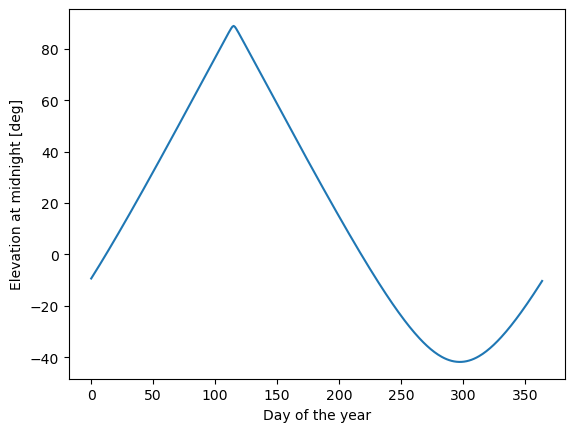

Best time: 2021-04-26T03:00:00.000
WARNING-astroquery- UnitsWarning: Unit 'e' not supported by the VOUnit standard. 
WARNING-astroquery- UnitsWarning: Unit 'Sun' not supported by the VOUnit standard. Did you mean uN?
Sequence start set to  2021-04-26T00:00:00.000
Sequence end set to  2021-04-26T06:00:00.000
ERROR-scifysim.injection- Now we use fpath to provide the root for appendix config files


0.010342691863670104
sep =  4.5
pa =  60.0
offset =  (-3.8971143170299736, 2.2500000000000004)
----------------------------------------
Switching to znse+co2
ERROR-scifysim.director- Correcting with only ZnSe and CO2
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
successfully spotted ncomp
inside_tuning [ 0.00000000e+00 -7.01037606e-08  0.00000000e+00 -7.01024679e-08] [ 0.         -0.00014691  0.         -0.00014691]


In [6]:
asim.context = sf.analysis.spectral_context(asim.config)#("config/vega_R400.ini")

In [7]:
diffuse = [asim.src.sky, asim.src.UT, asim.src.warm_optics, asim.src.combiner, asim.src.cold_optics]


# Making some exposure

## First, point the instrument to your target

In [8]:
asim.point(asim.sequence[3], asim.target)

## Then you can start an integration

In [9]:
integ = asim.make_metrologic_exposure(asim.src.planet, asim.src.star, diffuse,
                                      texp=t_exp)
integ.prepare_t_exp_base()

integ.consolidate_metrologic()

100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 95.49it/s]


<IPython.core.display.Math object>

## Nice view of the results

In [10]:
shift_step = 1/(asim.n_spec_ch+2)
outputs = np.arange(integ.summed_signal.shape[2])
isources = np.arange(len(integ.sums))
raw_sources = [integ.static[0], integ.static[1],
               integ.static[2], integ.static[3],
               integ.static, integ.starlight, integ.planetlight]

Number of photons for the 2 dark outputs
Sky    9.8e+04    9.8e+04 [e-/s]
UT_optics    2.0e+06    2.0e+06 [e-/s]
Warm Optics    1.5e+06    1.5e+06 [e-/s]
Combiner    1.2e-04    1.2e-04 [e-/s]
Cold Optics    1.9e-04    1.9e-04 [e-/s]
Starlight    1.3e+05    1.2e+05 [e-/s]
Planet    0.0e+00    0.0e+00 [e-/s]
Cold enclosure    4.2e+05    4.2e+05 [e-/s]
Dark current    1.6e-01    1.6e-01 [e-/s]

In total on output 3: 5.45e+06 [e-/s]
In total on output 3: 1.95e+13 [e-/s/m]
(67, 8)


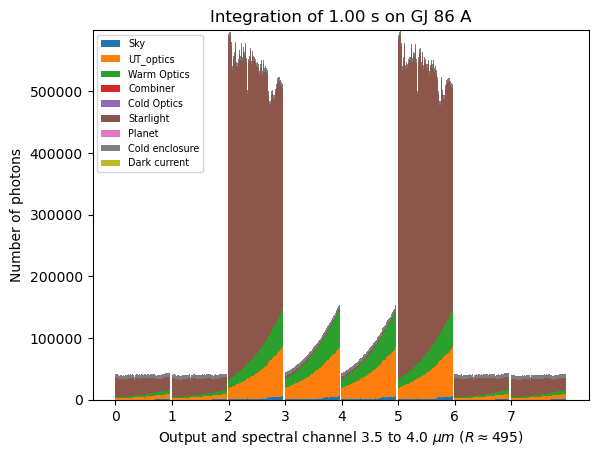



\hline
\hline
Source & Temperature & Mean transmission & Contribution\tablefootmark{a}\\ 
 & [K] & & $[e^- s^-1]$\\
\hline
Sky & 285.0 & 0.92 & 1.40e+05 \\
UT_optics & 290.0 & 0.31 & 2.92e+06 \\
Warm Optics & 285.0 & 0.60 & 2.20e+06 \\
Combiner & 100.0 & 0.50 & 1.70e-04 \\
Cold Optics & 100.0 & 0.56 & 2.66e-04 \\
Enclosure & 100.0 & N.A. & 4.23e+05 \\
Dark current & 60.0 & N.A. & 1.07e+01 \\
\hline
\tablefoot{
\tablefoottext{a}{On one dark output, cumulated over all wavelength bands}
\tablefoottext{b}{For R=400}
}


In [11]:
print("Number of photons for the 2 dark outputs")
for i, label in enumerate(integ.source_labels):
    #print(label + " %.1e [ph/s]"%(integ.sums[i].sum()))
    detail = integ.sums[i].sum(axis=0)[3:5] * integ.eta
    print(label + "    %.1e    %.1e [e-/s]"%(detail[0], detail[1]) )
for i, label in enumerate(integ.det_labels):
    #print(label + " %.1e [ph/s]"%(integ.sums[i].sum()))
    detail = integ.det_sources[i].sum(axis=0)
    print(label + "    %.1e    %.1e [e-/s]"%(detail, detail) )

print("")
fav_output = 3
mynpix = asim.config.getfloat("spectrograph", "n_pix_split")
supsum = np.nan_to_num(np.array(integ.sums))
print(f"In total on output {fav_output}: {supsum.sum(axis=(0,1))[fav_output]:.2e} [e-/s]")
maxbin = np.max(supsum.sum(axis=0), axis=0)

# To be portable per for different resolutions:
max_density = maxbin/np.gradient(asim.lambda_science_range).mean()
print(f"In total on output {fav_output}: {max_density[fav_output]:.2e} [e-/s/m]")

fig = sf.plot_tools.plot_output_sources(asim, integ, asim.lambda_science_range, t_exp=1.)

print()
print()
print(f"\\hline")
print(f"\\hline")
print("Source & Temperature & Mean transmission & Contribution\\tablefootmark{a}\\\\ ")
print(f" & [K] & & $[e^- s^{-1}]$\\\\")
print(f"\\hline")
for i, (asource,aname) in enumerate(zip(diffuse, integ.static_list)):
    print(f"{aname} & {asource.T:.1f} & {asource.trans(asim.lambda_science_range).mean():.2f} & {integ.sums[i].sum(axis=0)[3]:.2e} \\\\")

print(f"Enclosure & {integ.enclosure.T:.1f} & N.A. & {integ.det_sources[0].sum():.2e} \\\\")
print(f"Dark current & {60.:.1f} & N.A. & {integ.det_sources[1]*integ.det_sources[0].shape[0]:.2e} \\\\")
print(f"\\hline")

print(f"\\tablefoot{{")
print(f"\\tablefoottext{{a}}{{On one dark output, cumulated over all wavelength bands}}")
print(f"\\tablefoottext{{b}}{{For R=400}}")    
print(f"}}")
    

## Standard exposure


In [12]:
dit = 1.

In [13]:
integ = asim.make_exposure(asim.src.planet, asim.src.star, diffuse,
                                texp=dit,
                                monitor_phase=False,
                               spectro=asim.spectro)

In [14]:
from tqdm import tqdm
n_frames = 10
mynpix = 8
diffuse = [asim.src.sky, asim.src.UT, asim.src.warm_optics, asim.src.combiner, asim.src.cold_optics]
screen_age = 0.
reveta = 1/integ.eta
full_record = True
datacube = []
dit_intensity = []
starlights = []
planetlights = []
for i in tqdm(range(n_frames)):
    if screen_age>=20. :
        print("generating screen")
        asim.injector.update_screens()
        screen_age = 0.
    integ = asim.make_exposure(asim.src.planet, asim.src.star, diffuse,
                                texp=dit,
                                monitor_phase=False,
                               spectro=None)
    datacube.append(integ.get_total(spectrograph=None,
                                    t_exp=dit,
                                    n_pixsplit=mynpix))
    dit_intensity.append(reveta * integ.forensics["Expectancy"].sum(axis=0))
    if full_record:
        starlights.append(integ.starlight.astype(np.float32))
        planetlights.append(integ.planetlight.astype(np.float32))
    integ.reset() # This can be removed after new kernel start
    screen_age += dit
datacube = np.array(datacube)
dit_intensity = np.array(dit_intensity)
starlights = np.array(starlights)
planetlights = np.array(planetlights)

100%|███████████████████████████████████████████| 10/10 [00:28<00:00,  2.82s/it]


## The combiner matrix

In [15]:

plt.style.use("default")

(6, 12.5)


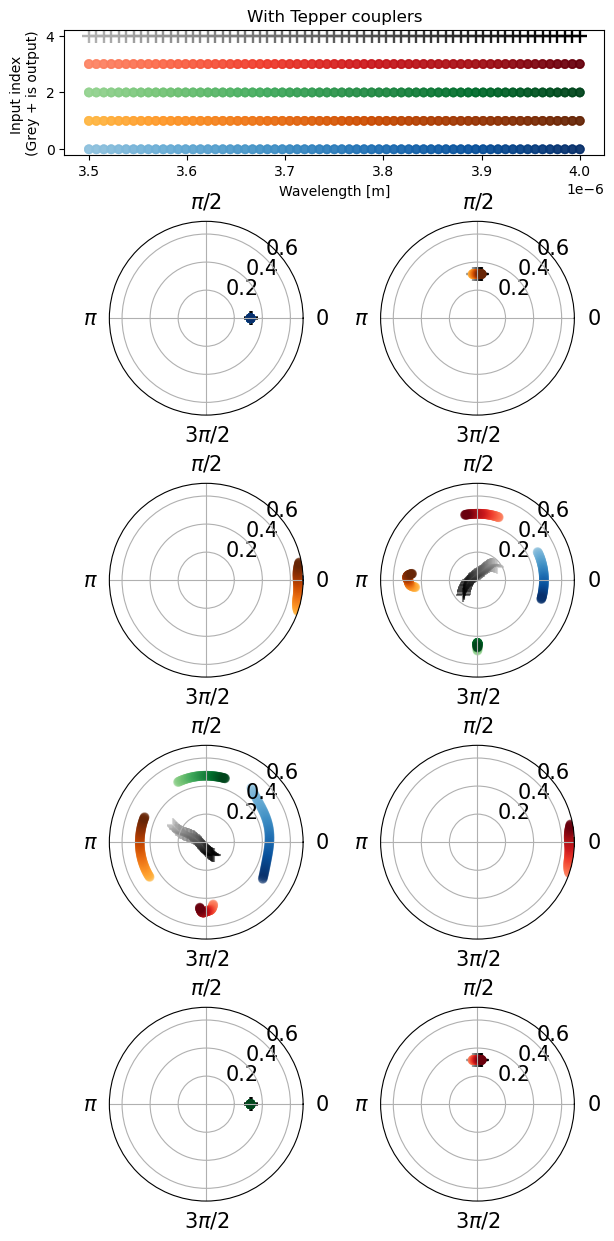

In [16]:
from kernuller.diagrams import plot_chromatic_matrix
fig, axs, matrix = plot_chromatic_matrix(asim.combiner.M,
                                         sf.combiners.lamb, asim.lambda_science_range,
                                         verbose=False, returnmatrix=True,minfrac=0.9,
                                         plotout=True, show=False, title="With Tepper couplers")

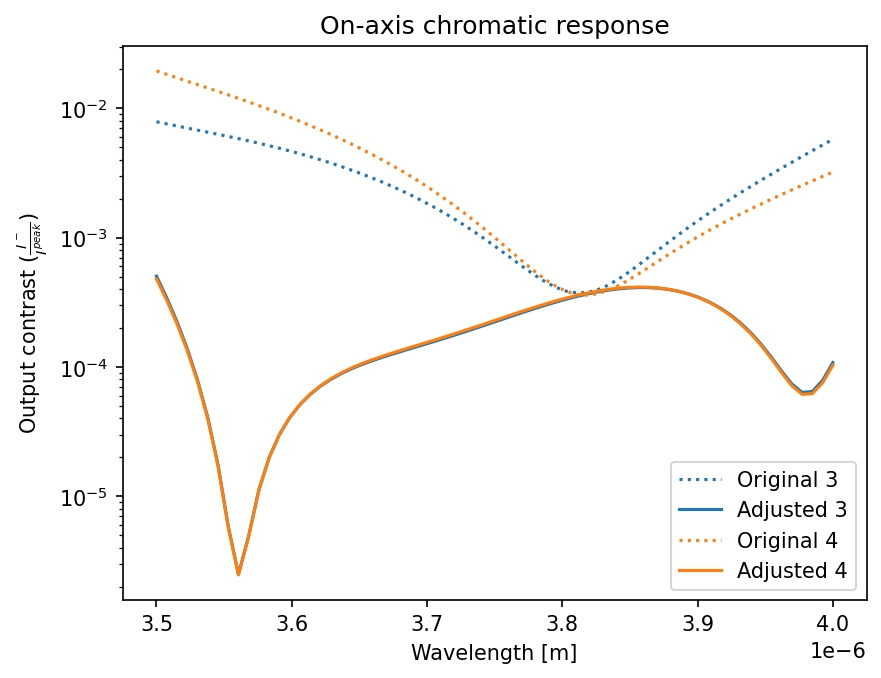

(6, 6.5)
out_switch (67, 4, 4)
inarray (67, 4)



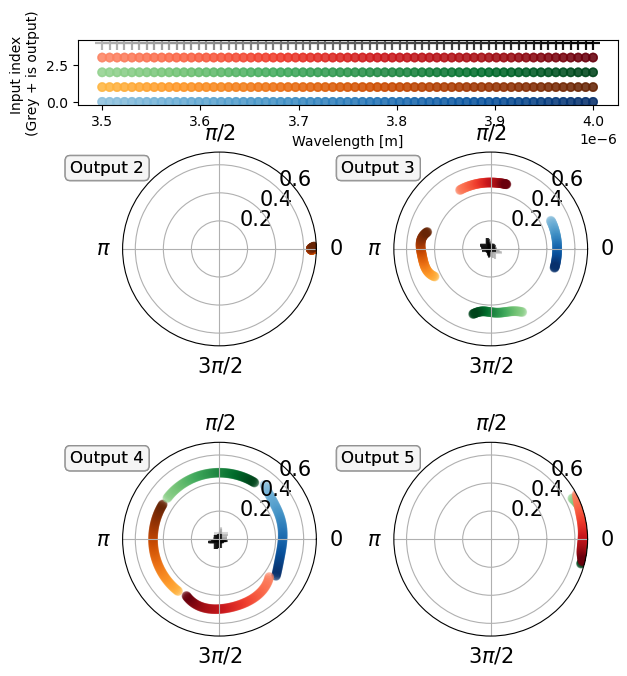

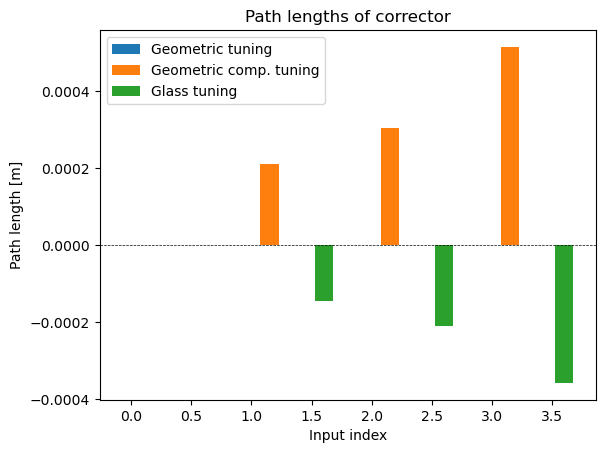

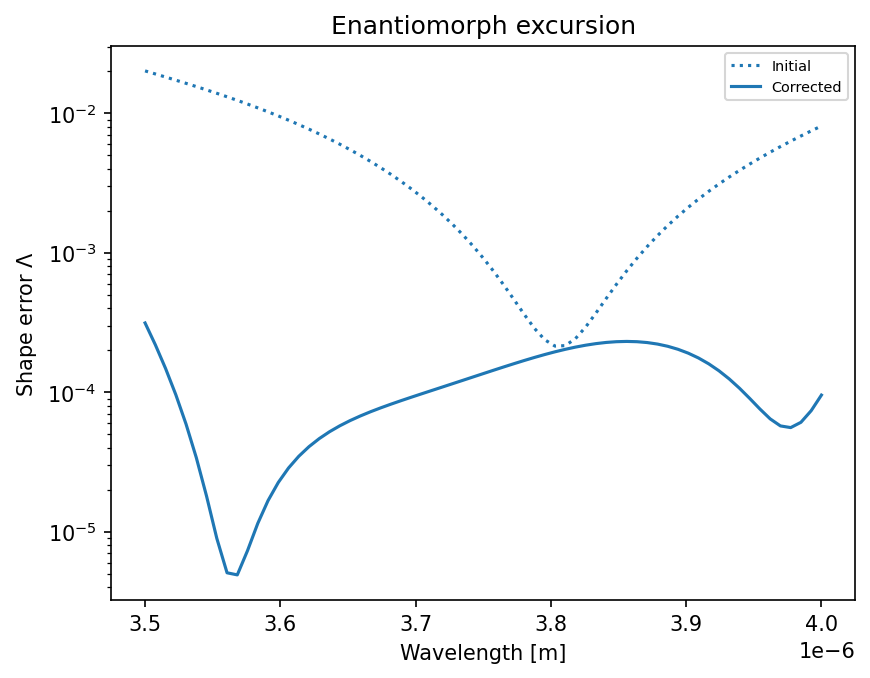

In [17]:
nul_plot, cmp_plot, bar_plot, shape_plot =\
        sf.plot_tools.plot_corrector_tuning_angel_woolf(asim.corrector, asim.lambda_science_range, asim.combiner)

In [18]:
asim.point(asim.sequence[3], asim.target)

In [19]:
from kernuller import pairwise_kernel
ak = pairwise_kernel(2)
myk = np.hstack((np.zeros((1,3)), ak, np.zeros((1,3))))
asim.combiner.K = myk


diffobs = np.einsum("ij, mkj->mk",asim.combiner.K, dit_intensity)
diff_std = np.std(diffobs, axis=0)

In [20]:
integ.reset()
integ = asim.make_exposure(asim.src.planet, asim.src.star, diffuse,
                                texp=dit,
                                monitor_phase=False,
                               spectro=None)
block = integ.get_total(spectrograph=None,t_exp=dit, n_pixsplit=mynpix)
print(f"datacube shape: {datacube.shape}")
print(f"dit = {dit} s")
brigh_max = np.max(np.mean(integ.forensics["Expectancy"][:,:,asim.combiner.bright], axis=0))
dark_max = np.max(np.mean(integ.forensics["Expectancy"][:,:,asim.combiner.dark], axis=0))
longest_exp_bright = 65000 / (brigh_max/dit)
longest_exp_dark = 65000 / (dark_max/dit)
print(f"Bright limit: {longest_exp_bright:.2f} s\n Dark limit: {longest_exp_dark:.2f} s")
data_std = np.std(datacube, axis=0)
diff_std = np.std(datacube[:,:,3]-datacube[:,:,4], axis=0)

integ.static = asim.computed_static
integ.mean_starlight = np.mean(starlights, axis=0)
integ.mean_planetlight = np.mean(planetlights, axis=0)
integ.mean_intensity = np.mean(dit_intensity, axis=0)

datacube shape: (10, 67, 8)
dit = 1.0 s
Bright limit: 1.24 s
 Dark limit: 4.65 s


In [21]:
mkdir /tmp/plots

mkdir: cannot create directory ‘/tmp/plots’: File exists


 s_d = [[  5194.19072721   5194.19072721  46392.98513438  46908.85879955
   46962.28524579  46726.73691371   5194.19072721   5194.19072721]
 [  5321.11872413   5321.11872413  47528.2886222   48056.66634389
   48110.24129579  47865.07773321   5321.11872413   5321.11872413]
 [  5457.3092726    5457.3092726   48755.72185673  49283.87872379
   49336.79234913  49086.74082211   5457.3092726    5457.3092726 ]
 [  5592.61661936   5592.61661936  49985.00762613  50498.66847617
   50549.97740751  50300.54473608   5592.61661936   5592.61661936]
 [  5771.08646397   5771.08646397  51610.09186929  52098.59982632
   52147.71294739  51902.70802064   5771.08646397   5771.08646397]
 [  5992.27976344   5992.27976344  53627.67041511  54079.44024759
   54125.64998416  53889.31080688   5992.27976344   5992.27976344]
 [  6111.89312003   6111.89312003  54745.82272366  55139.0586224
   55180.55673208  54962.71422131   6111.89312003   6111.89312003]
 [  6251.27214999   6251.27214999  56049.31832327  56373.085180

/lhome/romain/Documents/hi5/SCIFYsim/scifysim/analysis.py:263: RuntimeWarning: divide by zero encountered in log10
  amag = -2.5*np.log10(flux/self.thevegassflux)


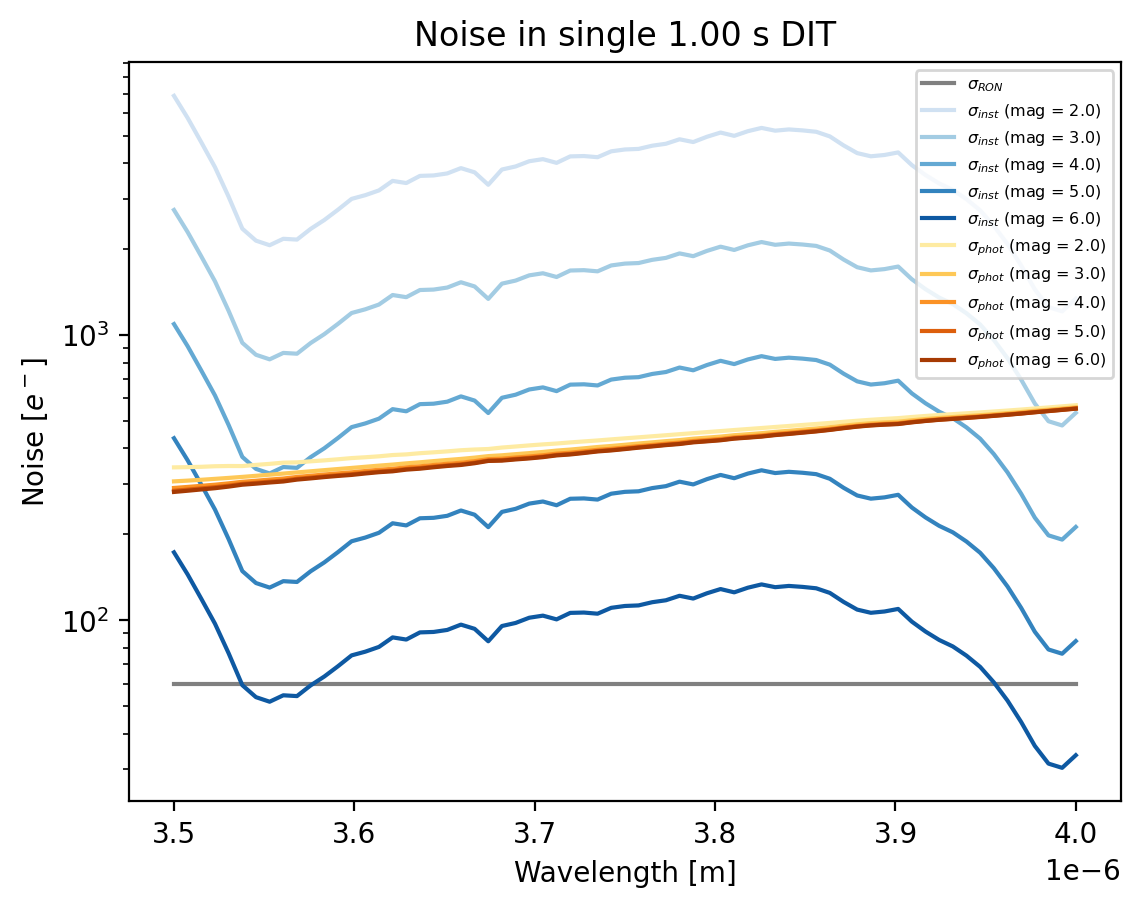

In [22]:
prof = sf.analysis.noiseprofile(integ, asim, diffobs, n_pixsplit=mynpix)
fig = prof.plot_noise_sources(asim.lambda_science_range, dit=1., show=False,
                             ymin=0.2, ymax=1.)
plt.legend(loc="upper right", fontsize="xx-small")

plt.savefig("/tmp/plots/noises.pdf", bbox_inches='tight', dpi=200)
plt.show()